# **Importing Libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset.
data = pd.read_csv("netflix1.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [3]:
# Display the columns quantity and names
print('The dataset has {} rows and {} columns'.format(data.shape[0], data.shape[1]))

The dataset has 8790 rows and 10 columns


## Data understanding.

In [4]:
data.rename(columns={'show_id': 'id'}, inplace=True)

In [5]:
data.columns

Index(['id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [6]:
# Understanding the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
data.describe(include = 'all')

,id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


# **Data Preprocessing**

## Data Cleaning.

In [8]:
# Finding the null values from the dataset.
print(data.isnull().sum())

id              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64


In [9]:
print(f"Duplicate Rows: {data.duplicated().sum()}")

Duplicate Rows: 0


## Data Transformation

### Convert data types

In [10]:
#  if date_added is in string format and convert it to datetime.
data["date_added"] = pd.to_datetime(data["date_added"])
data["release_year"] = data["release_year"].astype(int)


In [11]:
print(data[["date_added", "release_year"]])

     date_added  release_year
0    2021-09-25          2020
1    2021-09-24          2021
2    2021-09-24          2021
3    2021-09-22          2021
4    2021-09-24          1993
...         ...           ...
8785 2017-01-17          2016
8786 2018-09-13          2016
8787 2016-12-15          2012
8788 2018-06-23          2016
8789 2018-06-07          2016

[8790 rows x 2 columns]


### Feature Engineering

In [12]:
# Extract Year & Month from date_added.
data["year_added"] = data["date_added"].dt.year
data["month_added"] = data["date_added"].dt.month

# Create a New Column for Content Age
data["content_age"] = data["year_added"] - data["release_year"]
data.head()

,id,type,title,director,country,date_added,release_year,rating,duration,listed_in,year_added,month_added,content_age
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,Documentaries,2021,9,1
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",2021,9,0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",2021,9,0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"Children & Family Movies, Comedies",2021,9,0
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",2021,9,28


In [13]:
# Split 'listed_in' into Multiple Categories
data["genres"] = data["listed_in"].str.split(", ") # Since listed_in contains multiple genres, separate them
data['genres']

,genres
0,[Documentaries]
1,"[Crime TV Shows, International TV Shows, TV Ac..."
2,"[TV Dramas, TV Horror, TV Mysteries]"
3,"[Children & Family Movies, Comedies]"
4,"[Dramas, Independent Movies, International Mov..."
...,...
8785,"[International TV Shows, TV Dramas]"
8786,[Kids' TV]
8787,"[International TV Shows, Romantic TV Shows, TV..."
8788,[Kids' TV]


In [14]:
# Convert 'duration' into Numeric Format.
data["duration"] = data["duration"].str.extract("(\d+)").astype(float) #  If duration contains text (e.g., "90 min" or "1 Season")
data['duration']

,duration
0,90.0
1,1.0
2,1.0
3,91.0
4,125.0
...,...
8785,2.0
8786,3.0
8787,1.0
8788,1.0


## Data Validation and Export.

In [15]:
print(data.isnull().sum())  # Ensure no new missing values are introduced
data.dtypes  # Check data types

id              0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
year_added      0
month_added     0
content_age     0
genres          0
dtype: int64


,0
id,object
type,object
title,object
director,object
country,object
date_added,datetime64[ns]
release_year,int64
rating,object
duration,float64
listed_in,object


In [16]:
data.to_csv("netflix_cleaned.csv", index=False)

# **Exploratory Data Analysis (EDA)**

## Number of Movies vs TV Shows

In [17]:
data_count = data["type"].value_counts()

<ipython-input-18-f448883e6373>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_type.index, y=df_type.values, palette=["#ff9999","#66b3ff"])


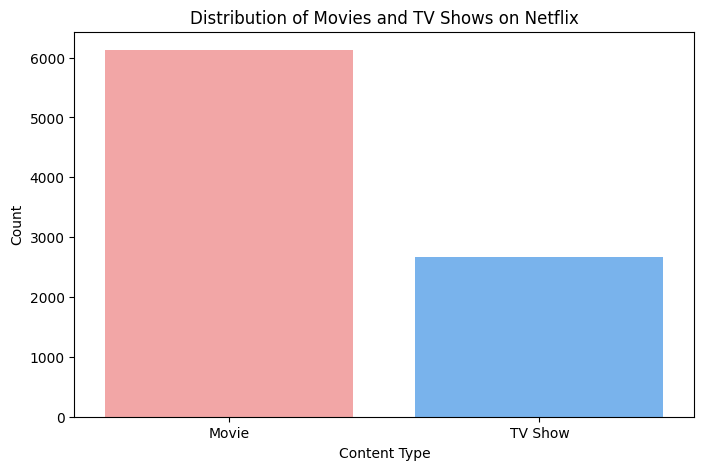

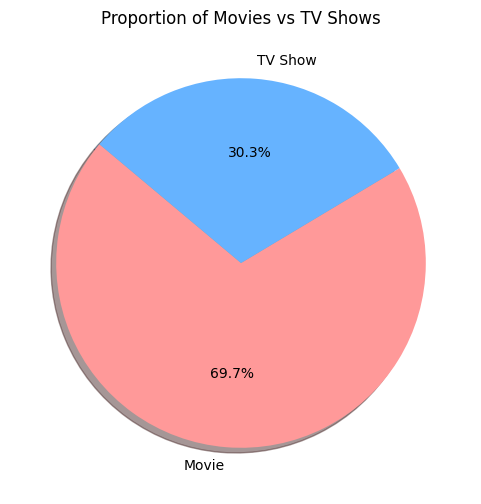

In [18]:
# Sample data
data_count = {"Movie": 6126, "TV Show": 2664}
df_type = pd.Series(data_count)

# Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=df_type.index, y=df_type.values, palette=["#ff9999","#66b3ff"])
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.show()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(df_type.values, labels=df_type.index, autopct='%1.1f%%', colors=["#ff9999","#66b3ff"], startangle=140, shadow=True)
plt.title("Proportion of Movies vs TV Shows")
plt.show()

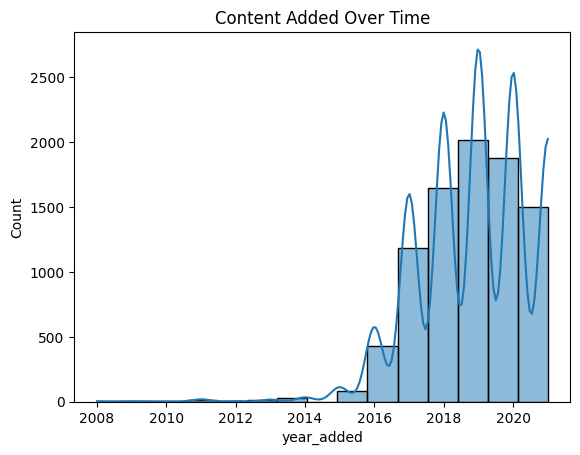

In [19]:
sns.histplot(data["year_added"], bins=15, kde=True)
plt.title("Content Added Over Time")
plt.show()

### Top 10 Most Popular Directors


In [20]:
data["director"].value_counts().head(10)

,count
director,
Not Given,2588
Rajiv Chilaka,20
Alastair Fothergill,18
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12


### Most Common Genres

<ipython-input-21-2fad97499fd3>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_genre["Count"], y=df_genre["Genre"], palette="coolwarm")


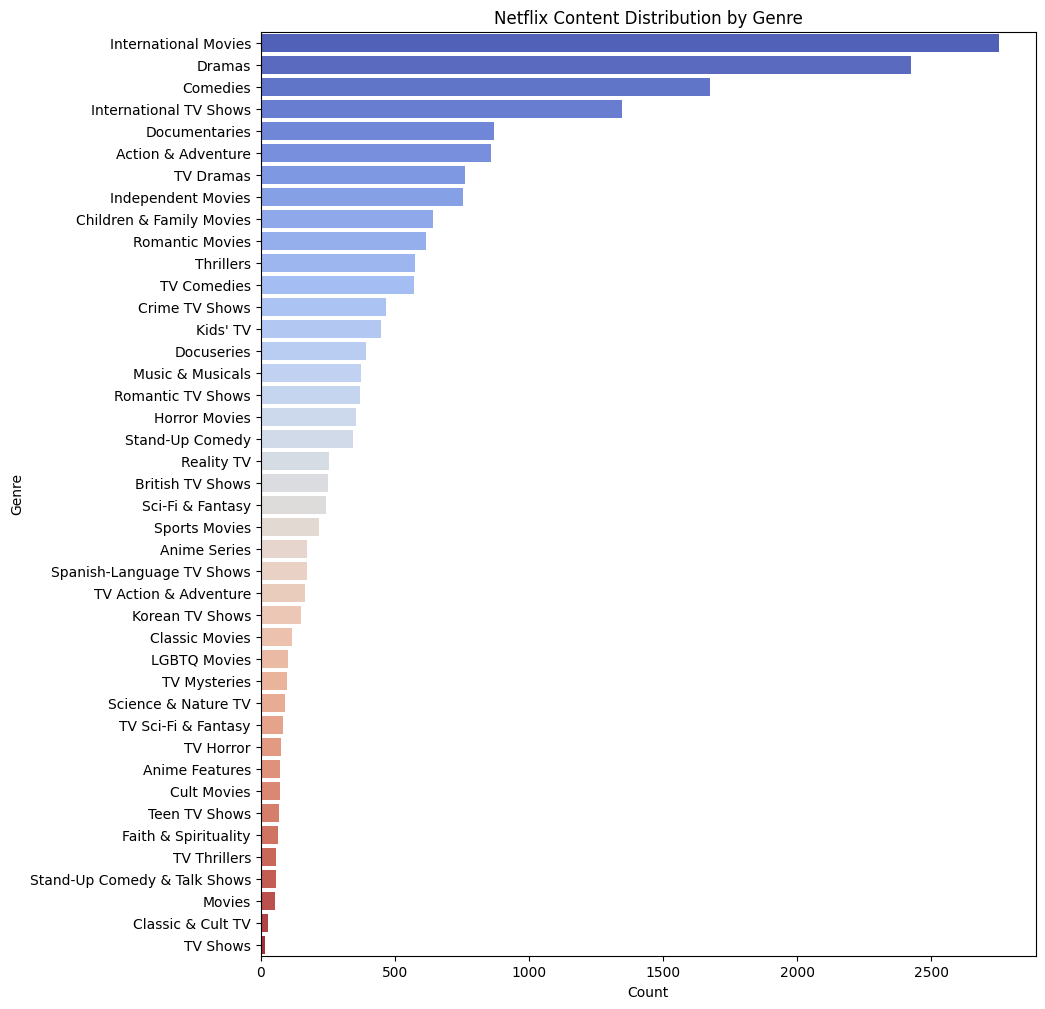

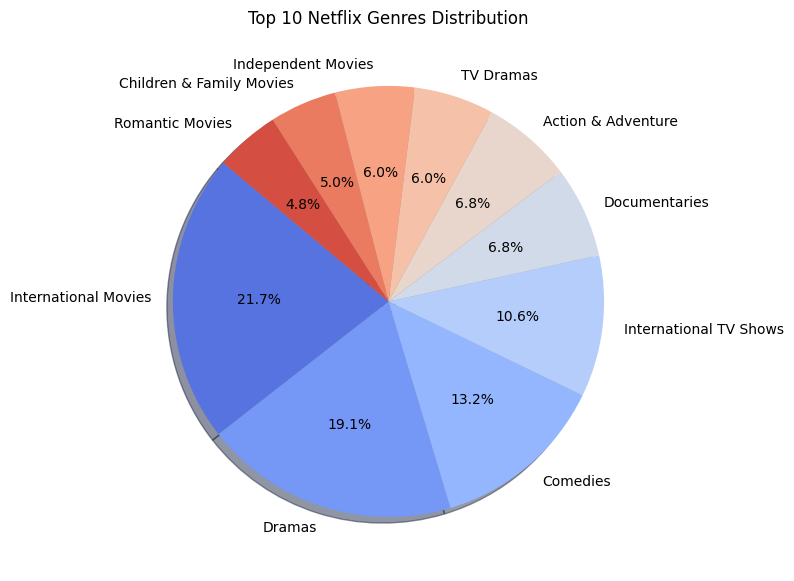

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Extract & Count Genres
all_genres = [genre for sublist in data["genres"].dropna() for genre in sublist]
genre_counts = Counter(all_genres)

# Convert to DataFrame & Sort
df_genre = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values("Count", ascending=False)

# Horizontal Bar Chart (Best for long labels)
plt.figure(figsize=(10, 12))
sns.barplot(x=df_genre["Count"], y=df_genre["Genre"], palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.title("Netflix Content Distribution by Genre")
plt.show()

# Pie Chart (Top 10 Genres)
top_10_genres = df_genre.head(10)  # Get Top 10 Genres Only

plt.figure(figsize=(7, 7))
plt.pie(top_10_genres["Count"], labels=top_10_genres["Genre"], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", len(top_10_genres)), shadow=True)
plt.title("Top 10 Netflix Genres Distribution")
plt.show()

### Country-wise Content Distribution

In [22]:
country_data = data["country"].value_counts().head(10)
print(country_data)

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: count, dtype: int64


<ipython-input-23-b196b45a5ef0>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_country.index, y=df_country.values, palette="viridis")


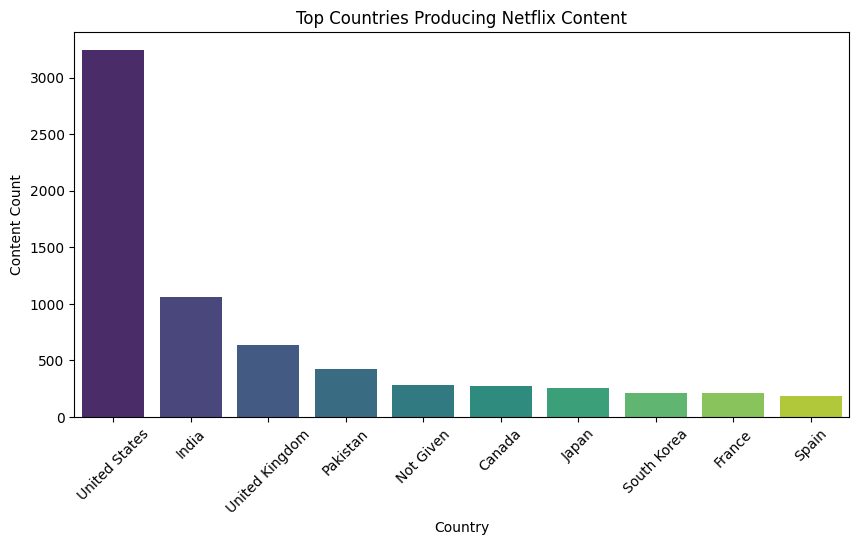

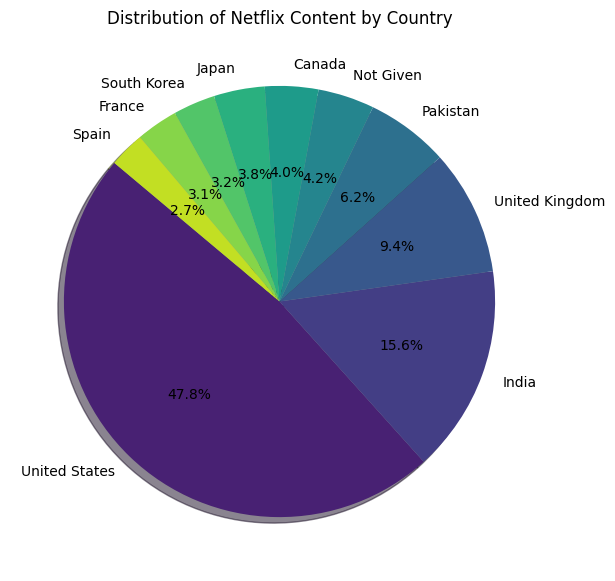

In [23]:
df_country = pd.Series(country_data)

# Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=df_country.index, y=df_country.values, palette="viridis")
plt.xlabel("Country")
plt.ylabel("Content Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title("Top Countries Producing Netflix Content")
plt.show()

# Pie Chart
plt.figure(figsize=(7, 7))
plt.pie(df_country.values, labels=df_country.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(df_country)), shadow=True)
plt.title("Distribution of Netflix Content by Country")
plt.show()

### Average duration of TV Shows and movies.

type
Movie      99.584884
TV Show     1.751877
Name: duration, dtype: float64


<ipython-input-26-3a6bfa9371d2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="coolwarm")


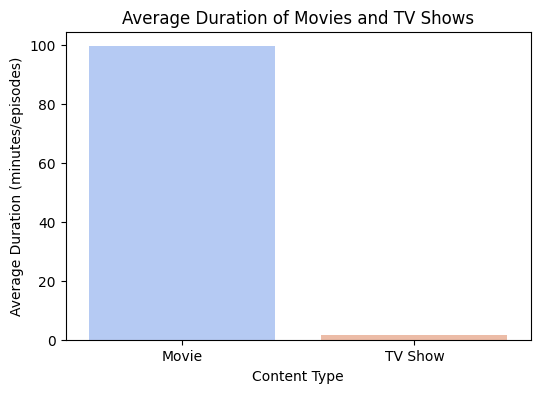

In [26]:
# Calculate average duration separately for Movies and TV Shows
avg_duration = data.groupby("type")["duration"].mean()

# Display result
print(avg_duration)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=avg_duration.index, y=avg_duration.values, palette="coolwarm")
plt.ylabel("Average Duration (minutes/episodes)")
plt.xlabel("Content Type")
plt.title("Average Duration of Movies and TV Shows")
plt.show()

## **Content Release and Additional Trend.**

### Netflix’s content library evolved over the years

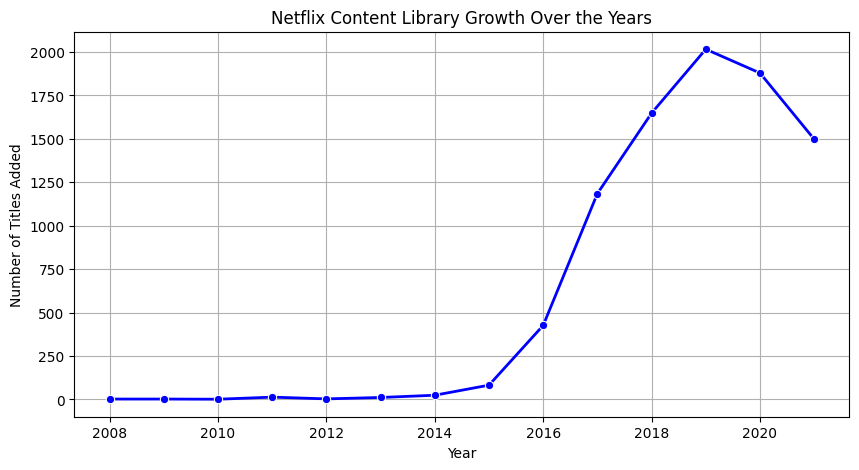

In [27]:
# Count the number of movies & TV shows added each year
yearly_content = data["year_added"].value_counts().sort_index()

# Visualization
plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker="o", linewidth=2, color="b")

plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Library Growth Over the Years")
plt.grid(True)
plt.show()

### Trend of content Additions per year.

<Figure size 1000x500 with 0 Axes>

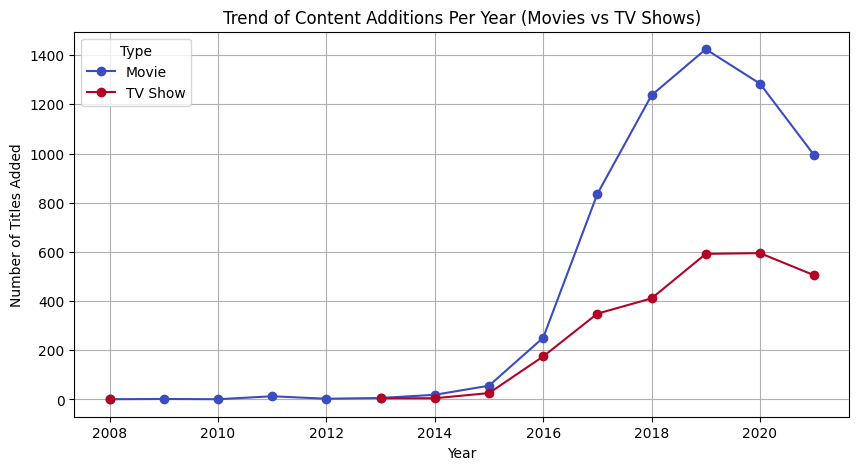

In [28]:
# Count movies and TV shows added each year
trend = data.groupby(["year_added", "type"])["id"].count().unstack()

# Visualization
plt.figure(figsize=(10, 5))
trend.plot(kind="line", marker="o", figsize=(10, 5), colormap="coolwarm")

plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Trend of Content Additions Per Year (Movies vs TV Shows)")
plt.legend(title="Type")
plt.grid(True)
plt.show()

###  Years did Netflix add the most content.

<ipython-input-29-8d5f78386d5e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_years.index, y=top_years.values, palette="viridis")


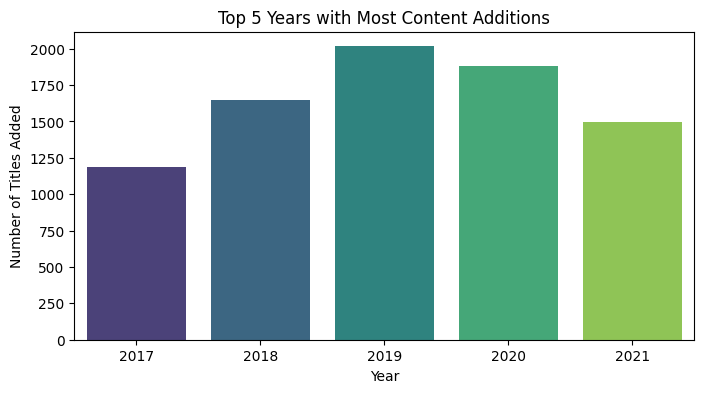

In [29]:
# Top 5 years with most content added
top_years = data["year_added"].value_counts().head(5)

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=top_years.index, y=top_years.values, palette="viridis")

plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Top 5 Years with Most Content Additions")
plt.show()

### Months see the highest number of content additions

<ipython-input-30-033ca3fe0b37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette="coolwarm")


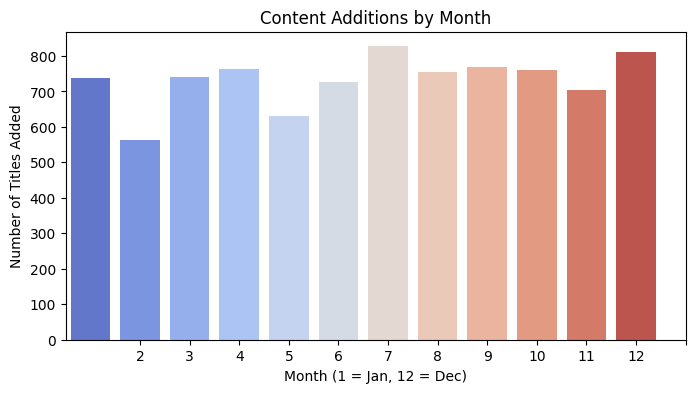

In [30]:
# Count of content added per month
monthly_additions = data["month_added"].value_counts().sort_index()

# Visualization
plt.figure(figsize=(8, 4))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette="coolwarm")

plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Number of Titles Added")
plt.title("Content Additions by Month")
plt.xticks(range(1, 13))
plt.show()

### Old is the content when it is added to Netflix

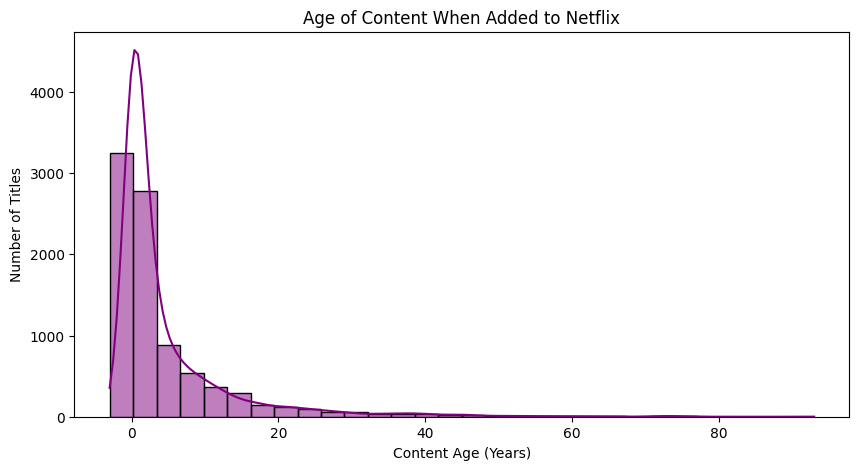

In [31]:
# Calculate age of content at time of addition
data["content_age"] = data["year_added"] - data["release_year"]

# Plot content age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data["content_age"], bins=30, kde=True, color="purple")

plt.xlabel("Content Age (Years)")
plt.ylabel("Number of Titles")
plt.title("Age of Content When Added to Netflix")
plt.show()

## **Country-Based Insights**


### countries contribute the most content to Netflix

<ipython-input-32-cbc9b84ed98d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")


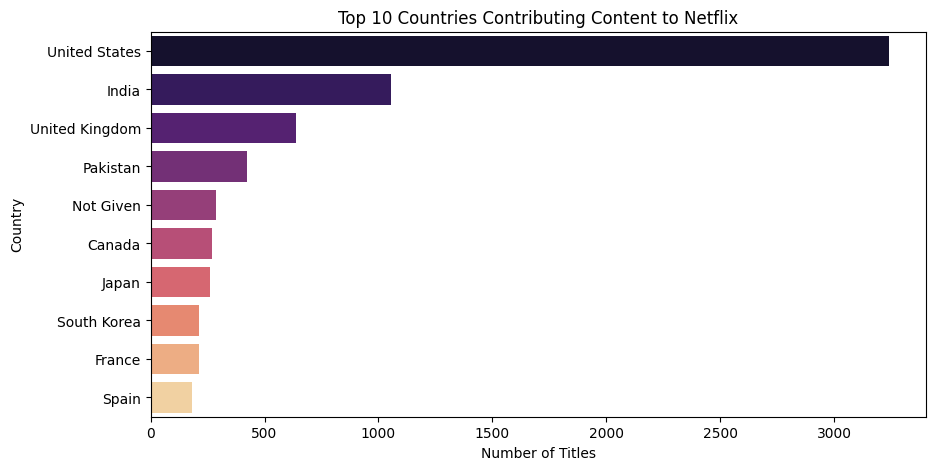

In [32]:
# Count content by country
country_counts = data["country"].value_counts().head(10)  # Top 10 countries

# Visualization - Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=country_counts.values, y=country_counts.index, palette="magma")

plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Countries Contributing Content to Netflix")
plt.show()

### top 10 countries with the highest number of movies and TV shows

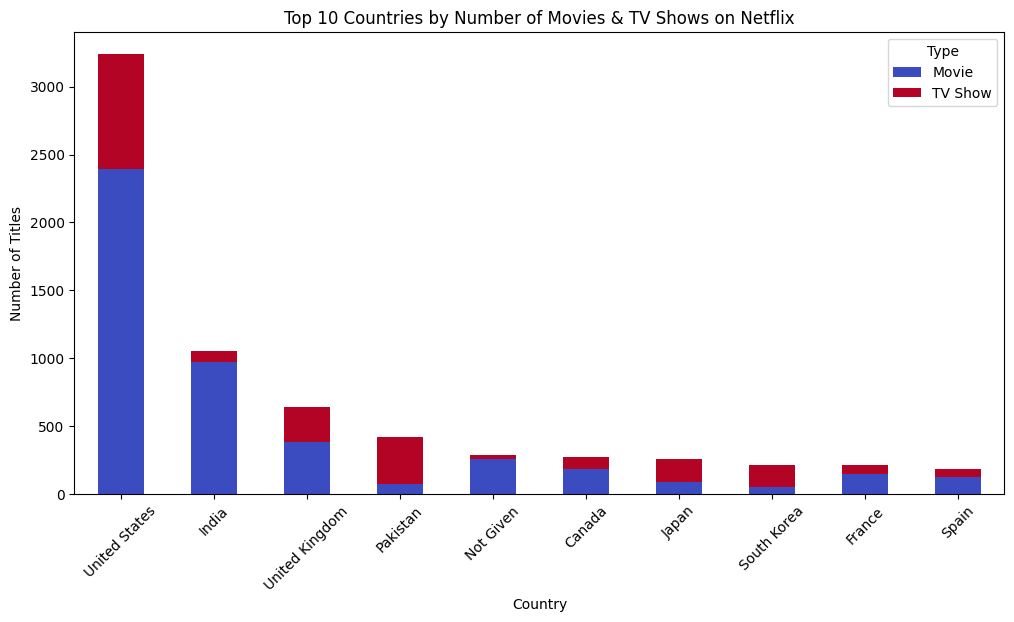

In [33]:
# Group data by country and type (Movie/TV Show)
country_type_counts = data.groupby(["country", "type"])["id"].count().unstack().fillna(0)

# Get the top 10 countries based on total content count
top_countries = country_type_counts.sum(axis=1).nlargest(10).index
top_countries_df = country_type_counts.loc[top_countries]

# Visualization - Stacked Bar Chart
top_countries_df.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")

plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.title("Top 10 Countries by Number of Movies & TV Shows on Netflix")
plt.legend(title="Type")
plt.xticks(rotation=45)
plt.show()

### Country wise diversity

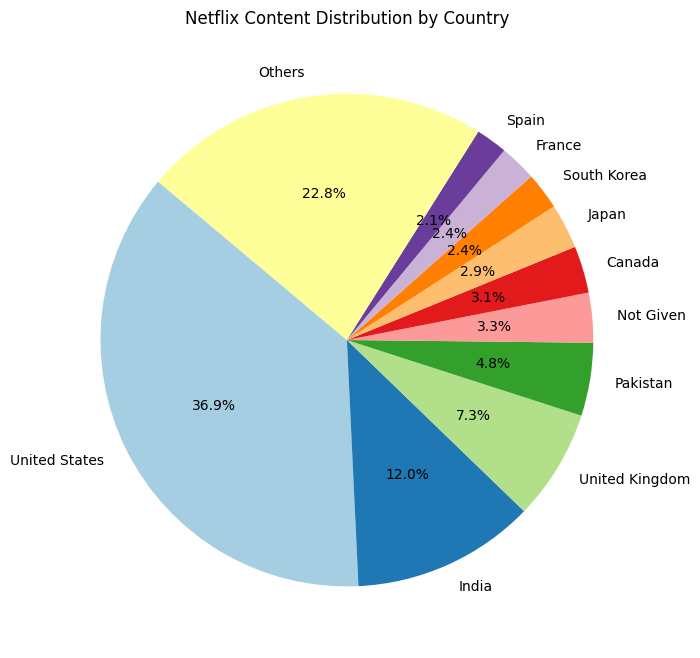

In [34]:
# Calculate percentage of content per country
country_percentage = (data["country"].value_counts() / len(data)) * 100

# Visualization - Pie Chart (Top 10 Countries + "Others")
top_countries = country_percentage.head(10)
other_percentage = country_percentage[10:].sum()  # All other countries combined

top_countries["Others"] = other_percentage  # Add "Others" category

plt.figure(figsize=(8, 8))
plt.pie(top_countries, labels=top_countries.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("Paired"))

plt.title("Netflix Content Distribution by Country")
plt.show()

## **Audience & Rating Analysis**

### Distribution of content ratings (G, PG, R, TV-MA, etc.)

<ipython-input-37-a4480782a5bf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="coolwarm")


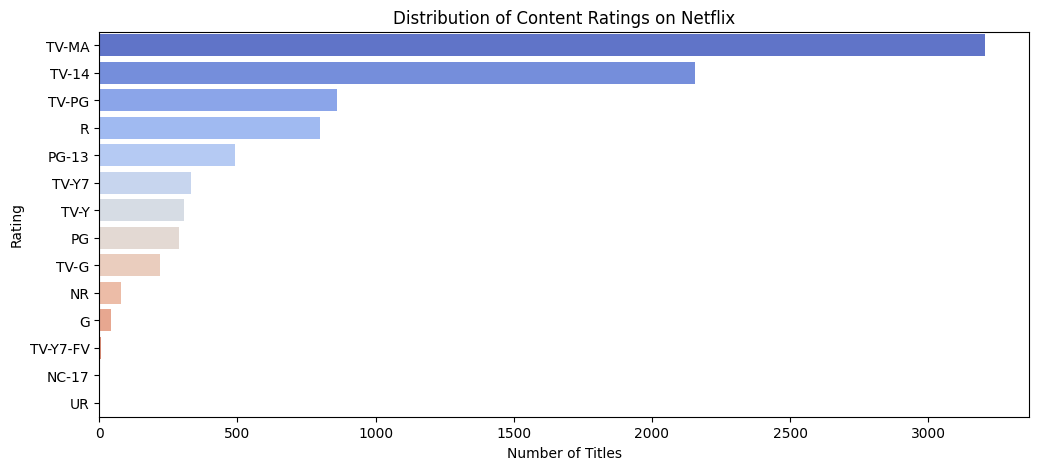

In [37]:
# Count occurrences of each rating
rating_counts = data["rating"].value_counts()

# Visualization - Bar Chart
plt.figure(figsize=(12, 5))
sns.barplot(x=rating_counts.values, y=rating_counts.index, palette="coolwarm")

plt.xlabel("Number of Titles")
plt.ylabel("Rating")
plt.title("Distribution of Content Ratings on Netflix")
plt.show()

### Netflix mature-rated content (TV-MA, R) growth over the years

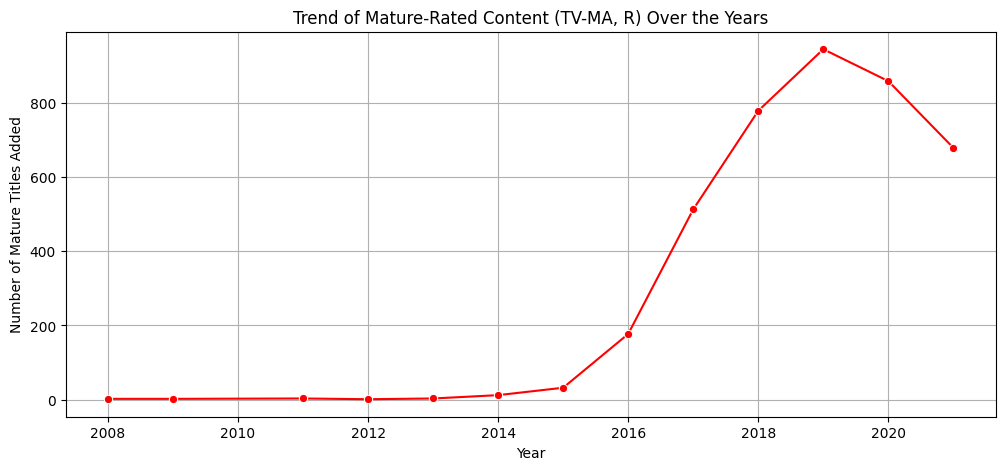

In [38]:
# Define mature content categories
mature_ratings = ["TV-MA", "R", "NC-17"]

# Filter for mature-rated content
mature_content = data[data["rating"].isin(mature_ratings)]

# Count mature-rated content added per year
mature_trend = mature_content.groupby("year_added").size()

# Visualization - Line Chart
plt.figure(figsize=(12, 5))
sns.lineplot(x=mature_trend.index, y=mature_trend.values, marker="o", color="red")

plt.xlabel("Year")
plt.ylabel("Number of Mature Titles Added")
plt.title("Trend of Mature-Rated Content (TV-MA, R) Over the Years")
plt.grid()
plt.show()

## **Genre-Specific Insights**

### Most popular genres on Netflix

<ipython-input-39-204dec2e9c97>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_genre["Genre"], x=df_genre["Count"], palette="coolwarm")


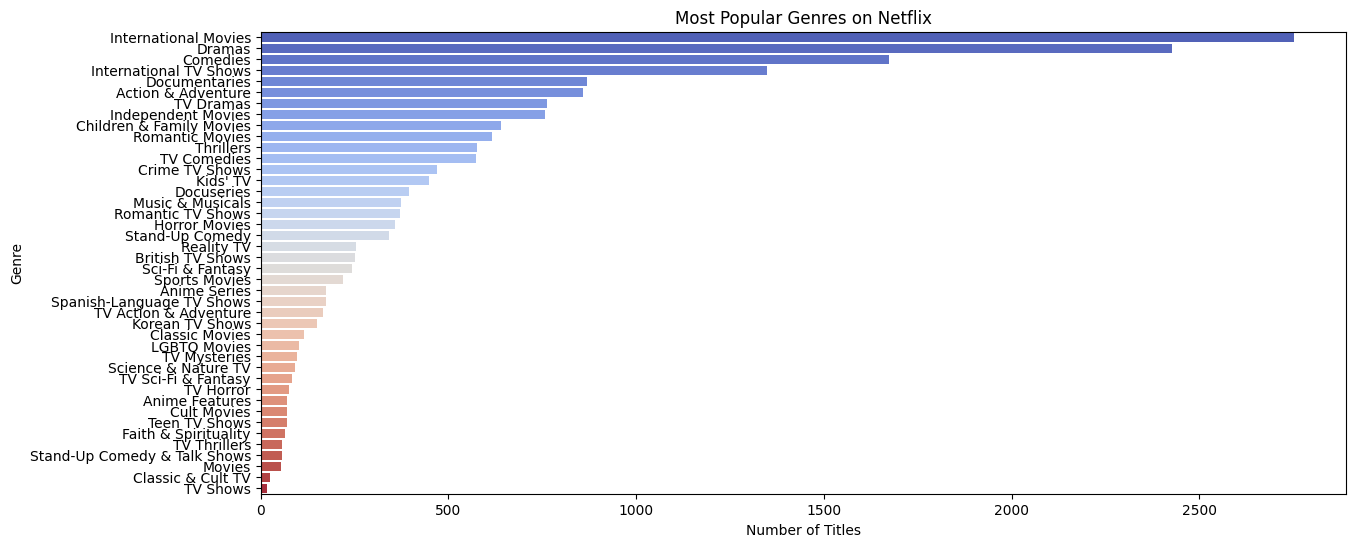

In [39]:
from collections import Counter

# Explode the genres column (since multiple genres exist per title)
all_genres = [genre for sublist in data["genres"].dropna() for genre in sublist]

# Count occurrences of each genre
genre_counts = Counter(all_genres)

# Convert to DataFrame
df_genre = pd.DataFrame(genre_counts.items(), columns=["Genre", "Count"]).sort_values("Count", ascending=False)

# Visualization - Bar Chart
plt.figure(figsize=(14, 6))
sns.barplot(y=df_genre["Genre"], x=df_genre["Count"], palette="coolwarm")

plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.title("Most Popular Genres on Netflix")
plt.show()

### Popularity of different genres changed over time

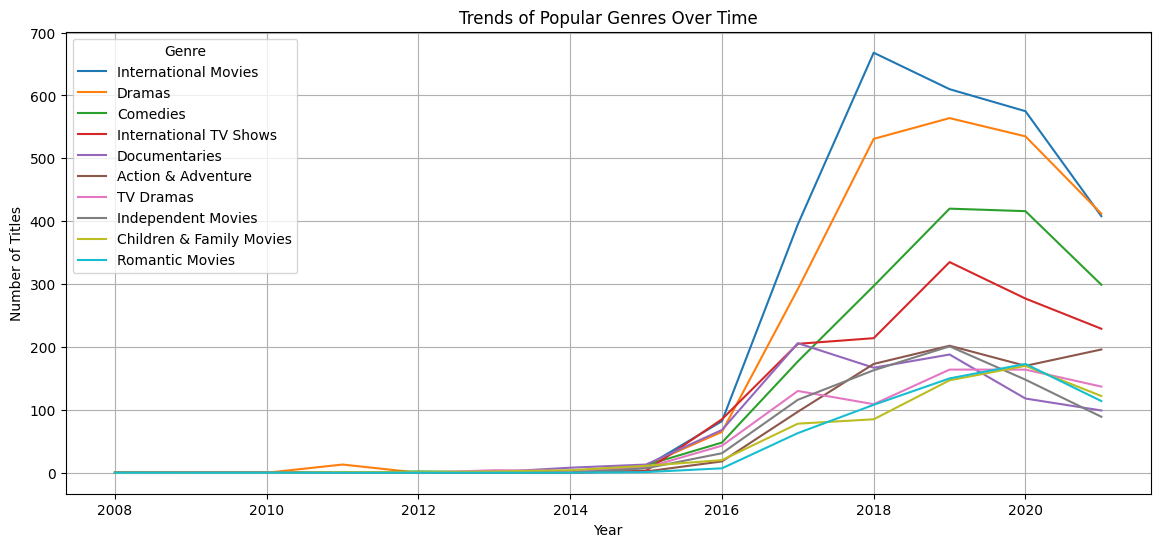

In [41]:
# Explode the dataset for proper genre counting
data_exploded = data.explode("genres")

# Count genre occurrences over the years
genre_trend = data_exploded.groupby(["year_added", "genres"]).size().unstack().fillna(0)

# Select the top 10 most common genres
top_genres = df_genre["Genre"].head(10)
genre_trend_filtered = genre_trend[top_genres]

# Visualization - Line Chart
plt.figure(figsize=(14, 6))
for genre in top_genres:
    sns.lineplot(x=genre_trend_filtered.index, y=genre_trend_filtered[genre], label=genre)

plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Trends of Popular Genres Over Time")
plt.legend(title="Genre")
plt.grid()
plt.show()

### genres are most common in each country

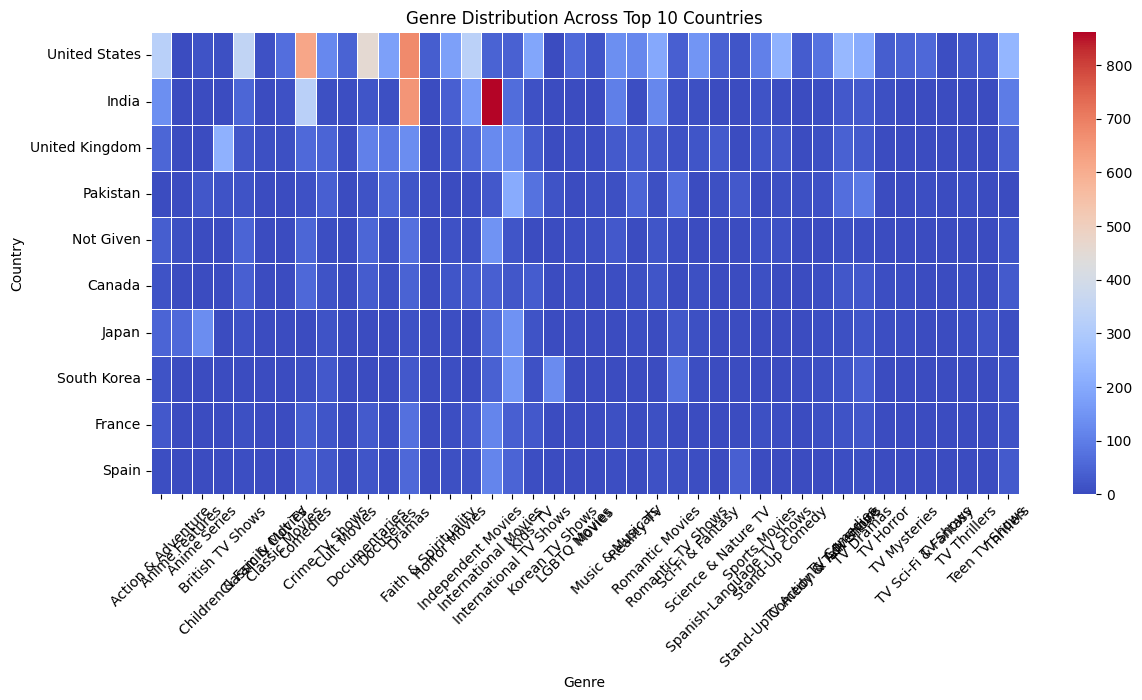

In [42]:
# Create a pivot table of genre distribution per country
genre_country_pivot = data_exploded.pivot_table(index="country", columns="genres", aggfunc="size", fill_value=0)

# Select top 10 contributing countries
top_countries = data["country"].value_counts().head(10).index
genre_country_pivot = genre_country_pivot.loc[top_countries]

# Visualization - Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(genre_country_pivot, cmap="coolwarm", linewidths=0.5)

plt.xlabel("Genre")
plt.ylabel("Country")
plt.title("Genre Distribution Across Top 10 Countries")
plt.xticks(rotation=45)
plt.show()

## **Netflix Content Over the Time**

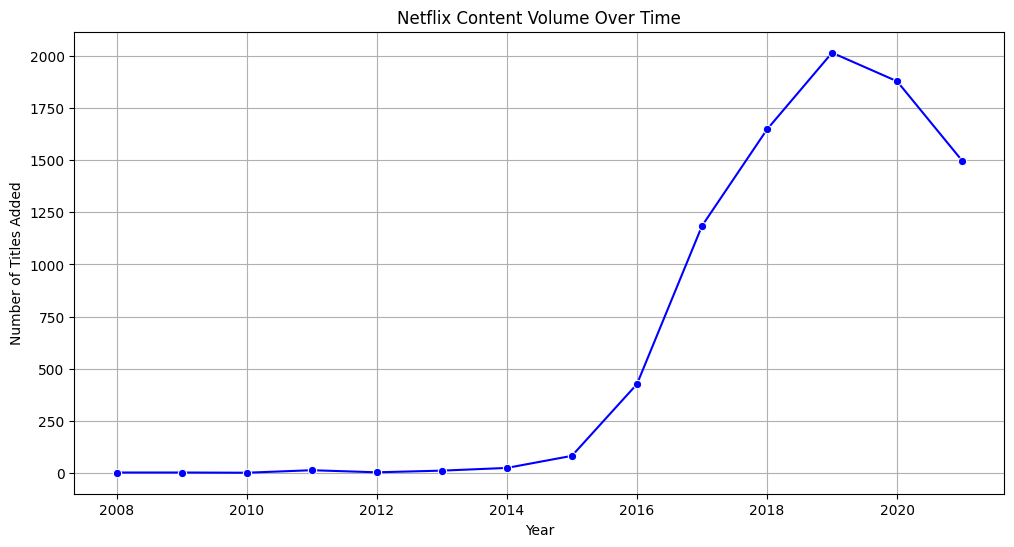

In [43]:
# Count the number of titles added per year
content_per_year = data["year_added"].value_counts().sort_index()

# Visualization - Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=content_per_year.index, y=content_per_year.values, marker="o", color="b")

plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Volume Over Time")
plt.grid()
plt.show()

## **Content (movies or TV shows) that growing faster**

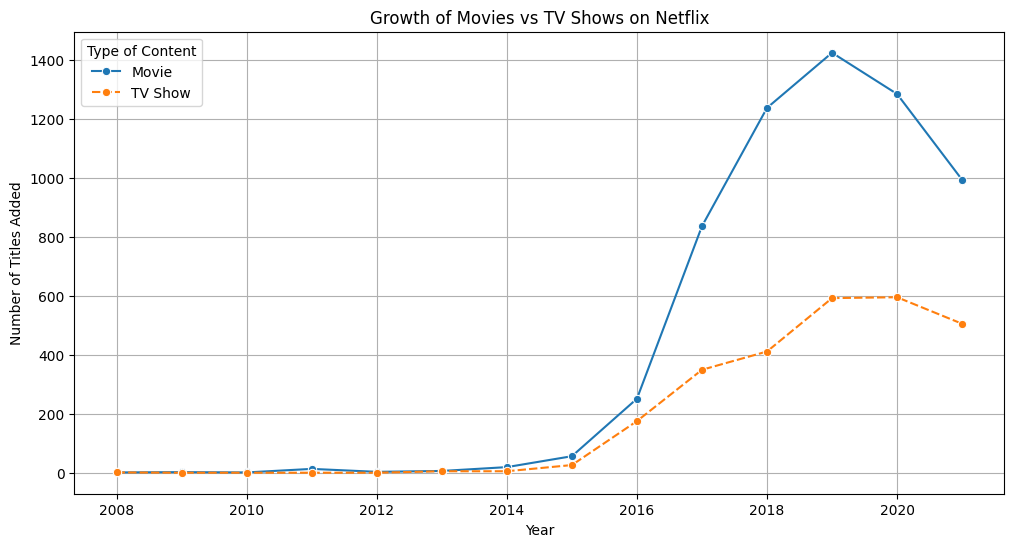

In [44]:
# Count the number of Movies and TV Shows added each year
content_type_trend = data.groupby(["year_added", "type"]).size().unstack().fillna(0)

# Visualization - Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_type_trend, marker="o")

plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.title("Growth of Movies vs TV Shows on Netflix")
plt.legend(title="Type of Content")
plt.grid()
plt.show()

## **Seasonal patterns in content additions**

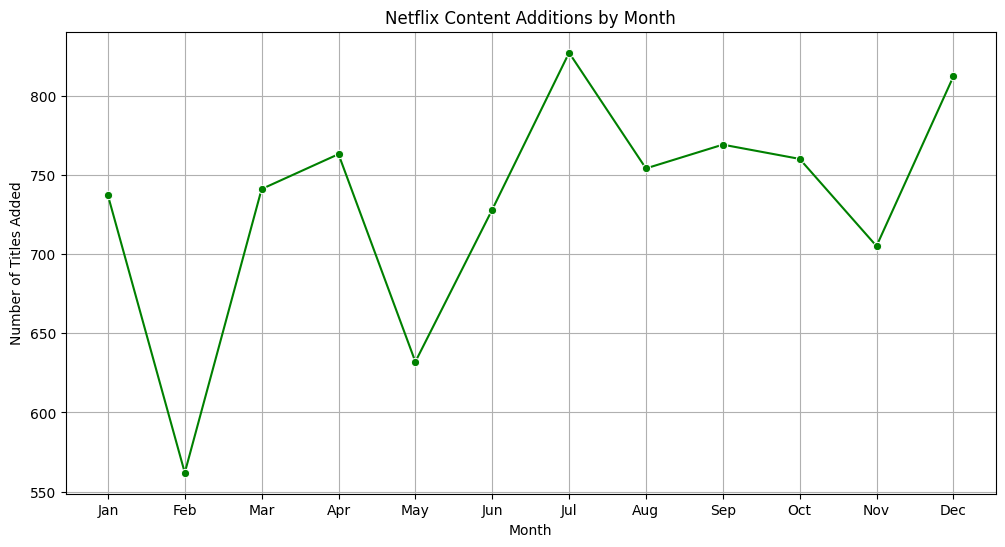

In [46]:
# Count content additions by month
monthly_trend = data["month_added"].value_counts().sort_index()

# Visualization - Line Chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker="o", color="g")

plt.xlabel("Month")
plt.ylabel("Number of Titles Added")
plt.title("Netflix Content Additions by Month")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.grid()
plt.show()

# **Content that will grow in the future**

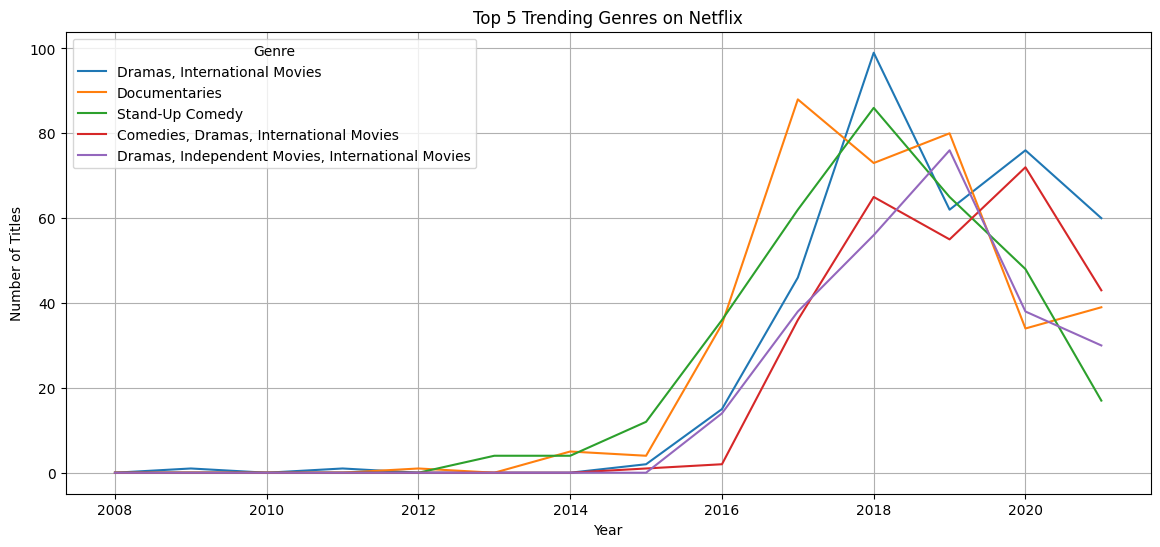

In [66]:
# Count genre occurrences over time
genre_trend = data.explode("genres").groupby(["year_added", "genres"]).size().unstack().fillna(0)

# Select top 5 trending genres
top_genres = genre_trend.sum().sort_values(ascending=False).head(5).index
genre_trend_filtered = genre_trend[top_genres]

# Visualization - Line Chart
plt.figure(figsize=(14, 6))
for genre in top_genres:
    sns.lineplot(x=genre_trend_filtered.index, y=genre_trend_filtered[genre], label=genre)

plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Top 5 Trending Genres on Netflix")
plt.legend(title="Genre")
plt.grid()
plt.show()

In [67]:
top_genres

Index(['Dramas, International Movies', 'Documentaries', 'Stand-Up Comedy',
       'Comedies, Dramas, International Movies',
       'Dramas, Independent Movies, International Movies'],
      dtype='object', name='genres')

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

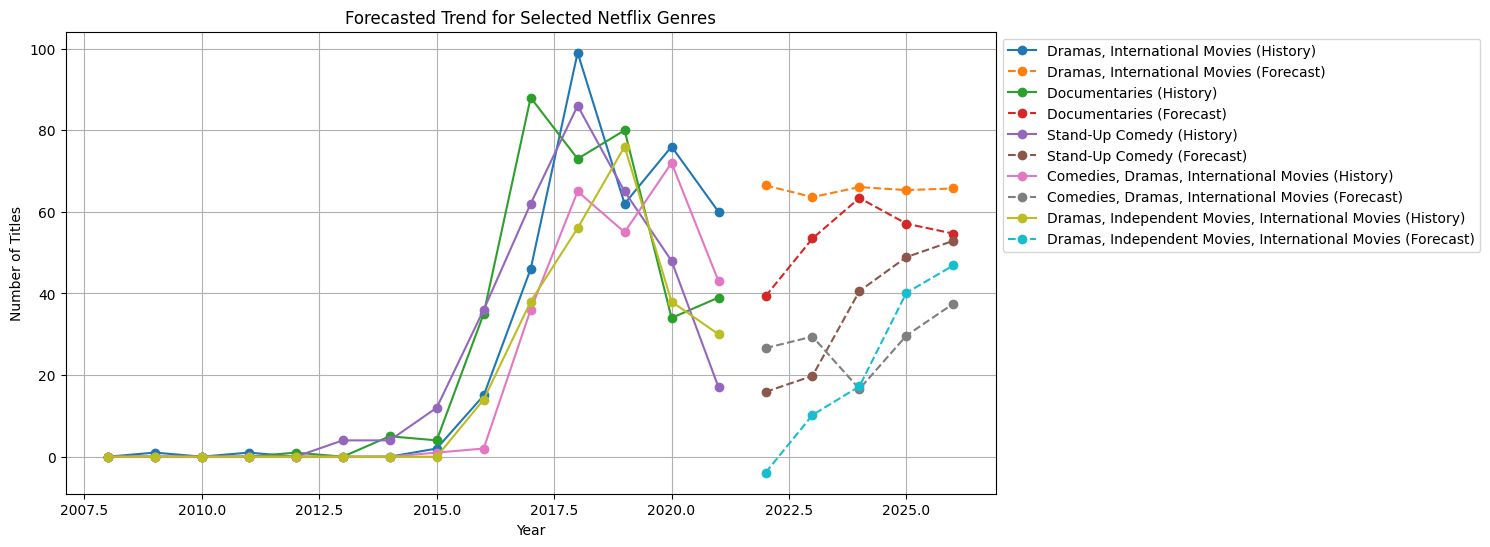

In [68]:
# Create a figure
plt.figure(figsize=(12, 6))

# Loop through each genre and train ARIMA model
for genre in top_genres:
    if genre in genre_trend_filtered.columns:
        genre_data = genre_trend_filtered[genre]

        # Train ARIMA model
        model = ARIMA(genre_data, order=(5,1,0))  # (p,d,q) values tuned
        model_fit = model.fit()

        # Forecast the next 5 years
        future_years = np.arange(genre_data.index[-1] + 1, genre_data.index[-1] + 6)
        forecast = model_fit.forecast(steps=5)

        # Plot each genre trend
        plt.plot(genre_data.index, genre_data, marker="o", label=f"{genre} (History)")
        plt.plot(future_years, forecast, marker="o", linestyle="dashed", label=f"{genre} (Forecast)")

# Final plot adjustments
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.title("Forecasted Trend for Selected Netflix Genres")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))  # Place legend outside the plot
plt.grid()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

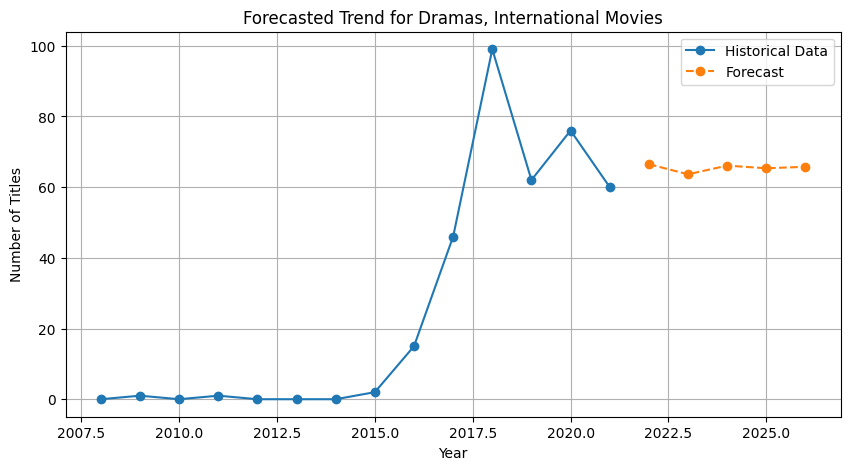

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

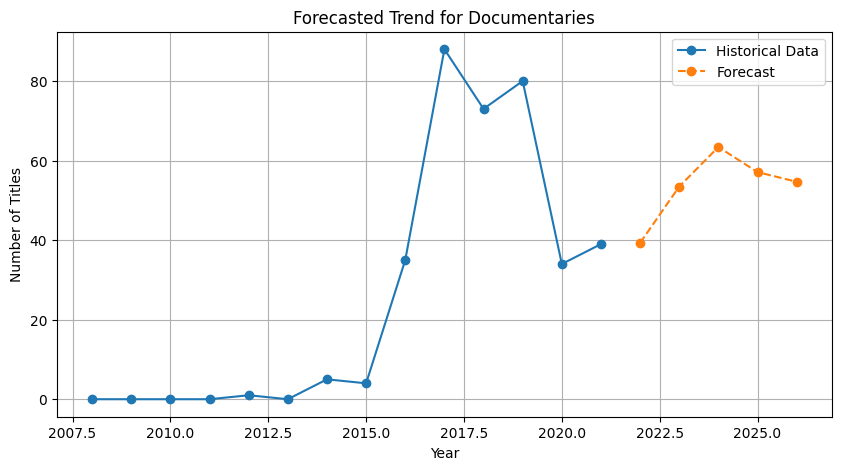

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

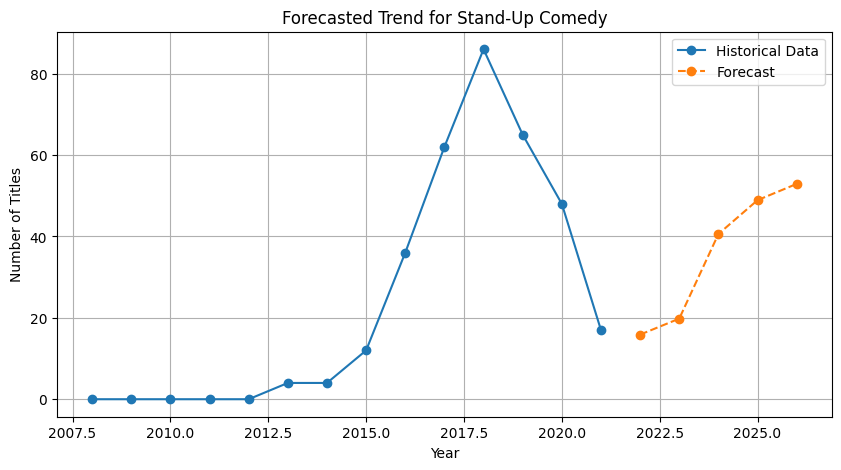

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

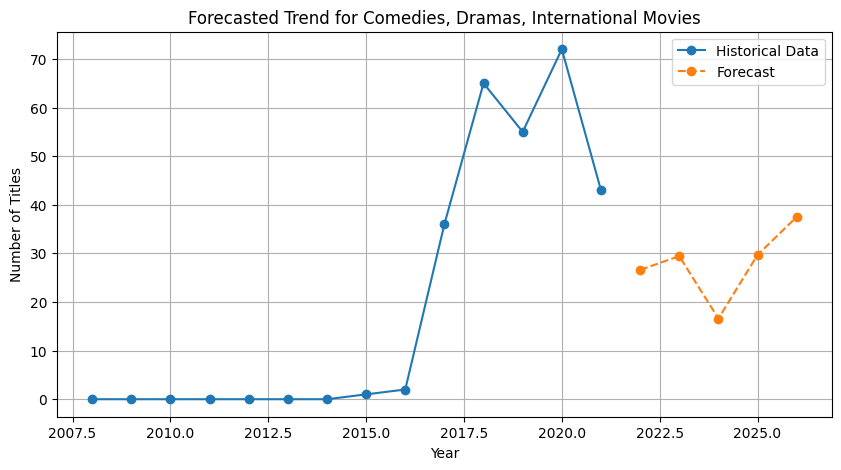

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Usin

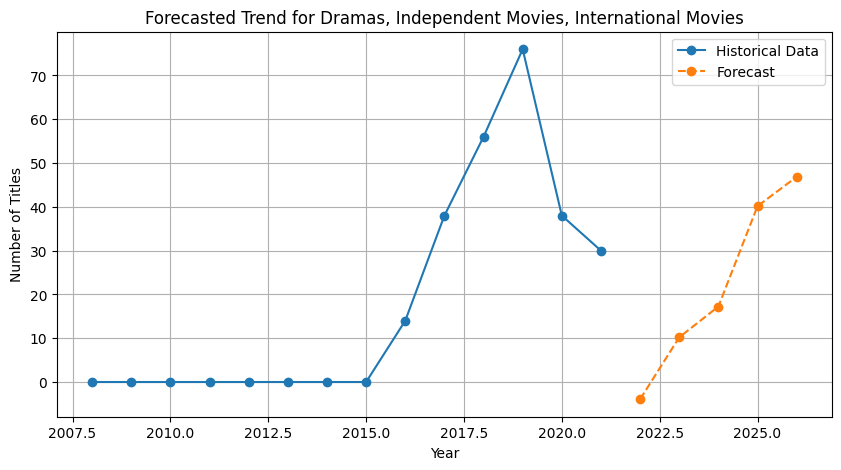

In [69]:
from statsmodels.tsa.arima.model import ARIMA

# Loop through each genre and generate forecasts
for genre in top_genres:
    if genre not in genre_trend_filtered.columns:
        print(f"Skipping {genre} (not found in dataset)")
        continue

    # Select the genre data
    genre_data = genre_trend_filtered[genre]

    # Train ARIMA model
    model = ARIMA(genre_data, order=(5,1,0))  # Adjust (p,d,q) as needed
    model_fit = model.fit()

    # Forecast the next 5 years
    future_years = np.arange(genre_data.index[-1] + 1, genre_data.index[-1] + 6)
    forecast = model_fit.forecast(steps=5)

    # Plot predictions
    plt.figure(figsize=(10, 5))
    plt.plot(genre_data.index, genre_data, label="Historical Data", marker="o")
    plt.plot(future_years, forecast, label="Forecast", marker="o", linestyle="dashed")
    plt.xlabel("Year")
    plt.ylabel("Number of Titles")
    plt.title(f"Forecasted Trend for {genre}")
    plt.legend()
    plt.grid()
    plt.show()


## 📈 Key Insights from Forecasting  
From our analysis, we can see that **Documentaries** and **Stand-Up Comedy** are projected to have the **highest growth** in the coming years.  

Netflix should consider **investing more** in these genres to align with future demand trends and audience preferences. 🎬📊  
